# 単変量非線形変換

特徴量を二乗，三乗すること以外にも， log, exp, sinなどの数学関数を用いることでモデルに有用な特徴量を作成できることがある．
log, expなどの関数はデータの相対的なスケールを修正してくれるので，線形モデルやニューラルネットワークモデルでモデリングしやすくなる．sin, cos関数は周期的なパターンをもつ関数を扱うときに有用である．

殆どのモデルは，個々の特徴量がおおよそガウス分布に従っているときに最もうまく機能する．整数のカウントデータに対してlog, expを用いると特に効果的である．

In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt

rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [2]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9 17
  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5  2  1
  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1  0  2  0
  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0  0  0  0  0
  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


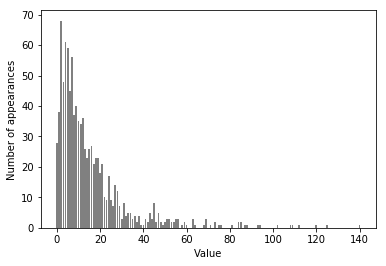

In [3]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
plt.show()

ポアソン分布になっている


In [5]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


In [6]:
# log0は定義されていない為+1
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

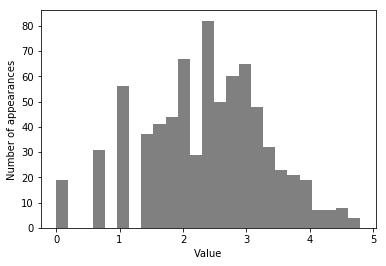

In [9]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
plt.show()

非対称性が少なく，非常に大きい外れ値はなくなっている(ガウス分布(正規分布)に近くなっている)

In [10]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


この種の変換は決定木ベースのモデルには関係が無い，線形モデルには強く効く．また回帰モデルの場合はターゲット変数yも変換した方が良い場合がある．

ビニング，多項式，交互作用はあるデータセットに対するモデルの性能に大きな影響を与える．